# **Chapter 4: Getting Started with neural networks: Classification and regression**

---

- Get started using NNs to solve real-world problems.
- Use in 3 most common use cases of NNs:
  - Binary classification (movie reviews as +ve or -ve)
  - Multiclass classification (news wires by topic)
  - Scalar regression (house price prediction)
- Get introduced to data preprocessing, basic model architecture principles, model evaluation.

IMPORTANT GLOSSARY:

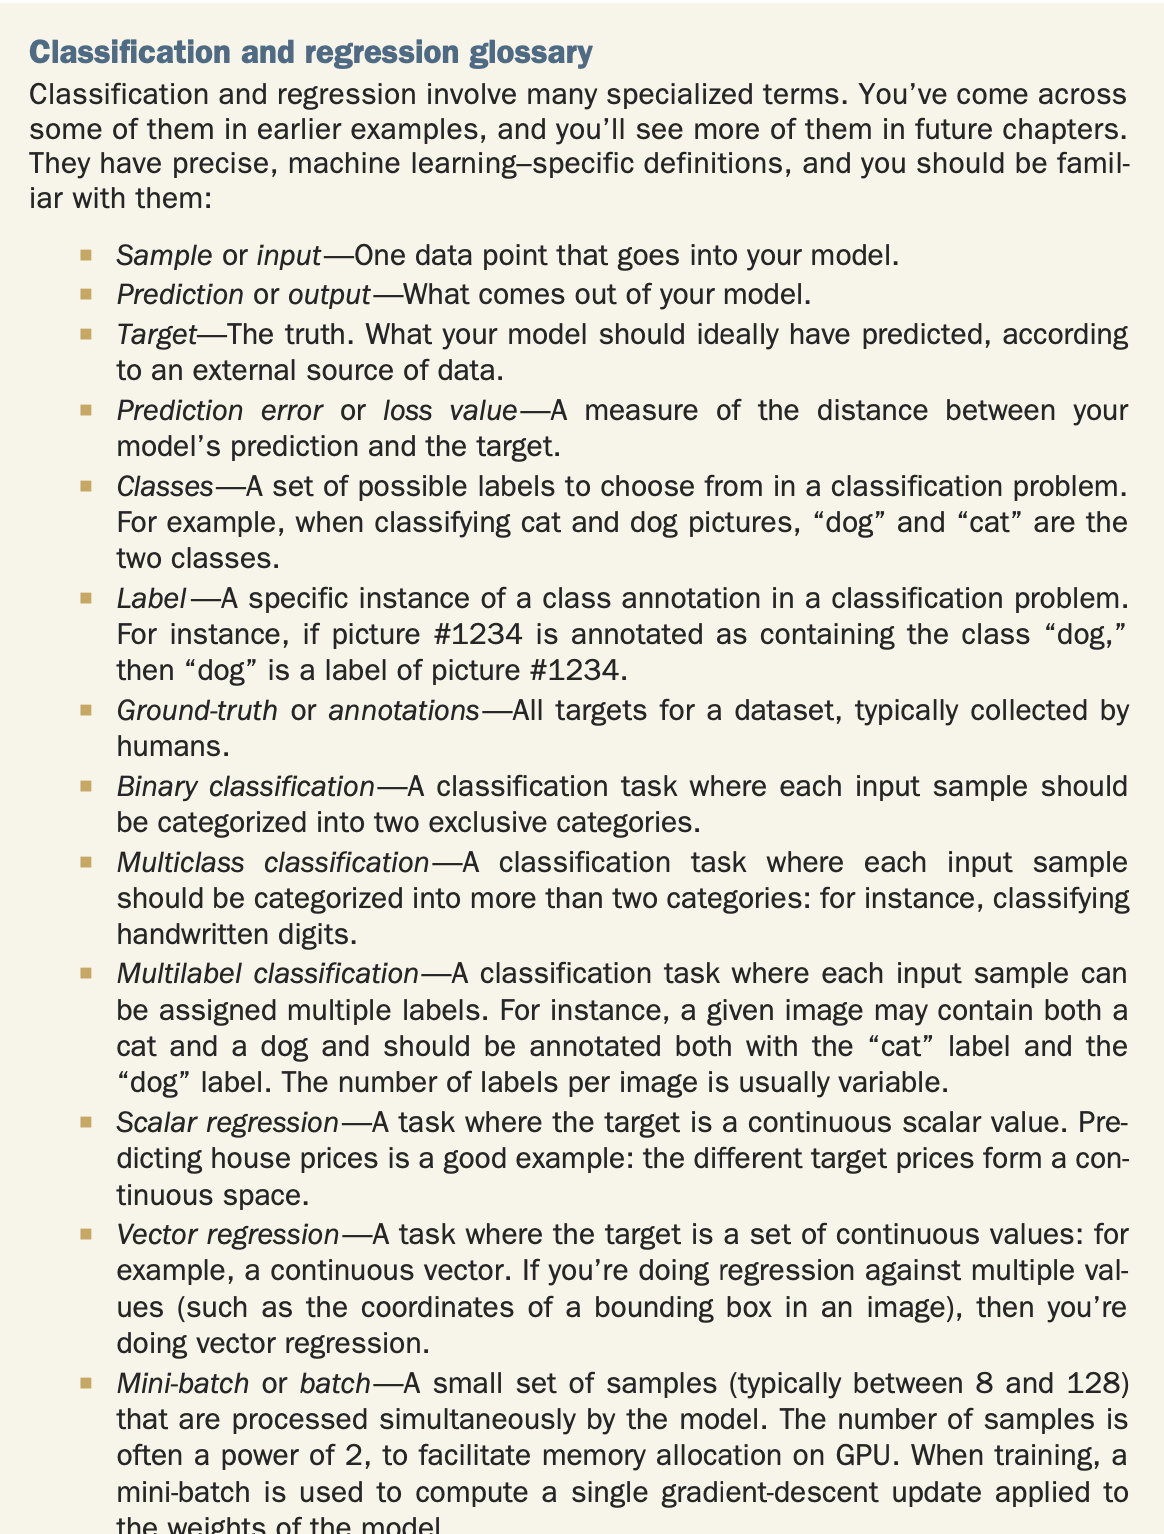

# 4.1 Classifying movie reviews: A binary classification example

## 4.1.1 The IMDB dataset

- 50,000 highly polarized views from IMDB.
- 25K training and 25K testing split.
- 50% positive and 50% negative reviews.
- The dataset comes packaged with Keras.
- Already preprocessed.
- Reviews (sequence of words) are turned into sequences of integers (each integer => specific word in a dictionary).

### Loading the IMDB dataset

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# num_words=10000 uses only the top 10000 most freqwuently occuring words, this helps in a more manageable vector data

# train_data and test_data are list of reviews: review is a list of word indices

# train_labels and test_labels are 0s or 1s (0 for negative, 1 for positive review)

In [ ]:
max([max(sequence) for sequence in train_data]) # no word index exceeds 10000, as it should be

9999

### Decoding reviews back to text

In [ ]:
word_index = imdb.get_word_index() # dict mapping words to integer index
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

In [ ]:
# decoded_review

## 4.1.2 Preparing the data

Can't directly feed a list of ints to a NN. But NNs expect to process contiguous batches of data. Gotta turn our lists into tensors. 2 ways:

1. Pad lists to have same length, turn them into int tensors of shape `(samples, max_length)`.
2. *Multi-hot encode* your lists. So if a sequence is `[8, 5]`, we turn it into a 10,000-dimensional vector where all indices are 0s except indices 8 and 5. Then use a `Dense` layer as the first layer in your model.

We go ahead with the second option.

### Encoding the integer sequences via multi-hot encoding

In [11]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension)) # create an all-0 matrix of shape (len(sequences), dimension)
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i, j] = 1. # sets specific indices of results[i] to 1s
  return results

x_train = vectorize_sequences(train_data) # vectorized training data
x_test = vectorize_sequences(test_data) # vectorized test data

In [ ]:
# x_train[0]

# Also vectorize the labels:

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## 4.1.3 Building your model

For us, the input data is vectors, and the labels are scalars (0 or 1): one of the simplest problems. A plain stack of densely connected, `Dense` layers with `relu` activations works great with this.

2 key architecture decisions to make:
1. *How many layers* to use.
2. *How many units* in each layer.

For now, trust the author with the following architecture:
1. 2 layers with 16 units each
2. Third layer to output the scalar predictions:

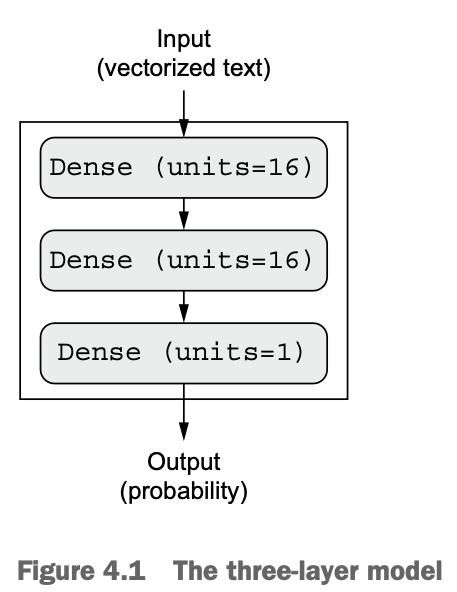

### Model definition

In [15]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Each `Dense` layer with a `relu` activation implements the following chain of tensor operations:
```python
output = relu(dot(input, W) + b)
```
`W` matrix will have shape `(input_dimension, 16)`.

Can intuitively understand the dimensionality of your representation space as "how much freedom you're allowing the model to hae when learning internal representations." More units -> learn more complex representations -> more computationally expensive -> may lead to unwanted patterns -> patterns that may improve performance on training data, but not on test data.

Final layer uses a sigmoid function so as to output a probability.

Loss Function: Since we are dealing with a binary classification problem, it's best to use `binary_crossentropy` loss. We can use `mean_squared_error` too. But crossentropy is usually the best choice when dealing with binary classification problems.

Optimizer: `rmsprop`: usually a good default choice for virtually any problem.

### Compiling the model

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

## 4.1.4 Validation your approach

Setting aside a validation set to monitor the accuracy of the model during training. Let's set up a validation set by setting apart 10,000 samples from the original training data.

### Settting aside a validation set

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training your model:

- Train the model for 20 epochs
- Mini-batches of 512 samples
- Done by passing the validation data as the `validation_data` argument

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 146ms/step - accuracy: 0.6727 - loss: 0.6105 - val_accuracy: 0.8596 - val_loss: 0.4117
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.8939 - loss: 0.3483 - val_accuracy: 0.8841 - val_loss: 0.3192
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9226 - loss: 0.2458 - val_accuracy: 0.8742 - val_loss: 0.3106
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9346 - loss: 0.1976 - val_accuracy: 0.8909 - val_loss: 0.2749
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.9463 - loss: 0.1617 - val_accuracy: 0.8760 - val_loss: 0.3113
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9584 - loss: 0.1373 - val_accuracy: 0.8787 - val_loss: 0.3009
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9654 - loss: 0.1142 - val_accuracy: 0.8854 - val_loss: 0.2961
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.9731 - loss: 0.0959 - val_accuracy: 0.8816 - 

In [ ]:
# Look at the history from the History object

history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

### Plotting the training and validation loss

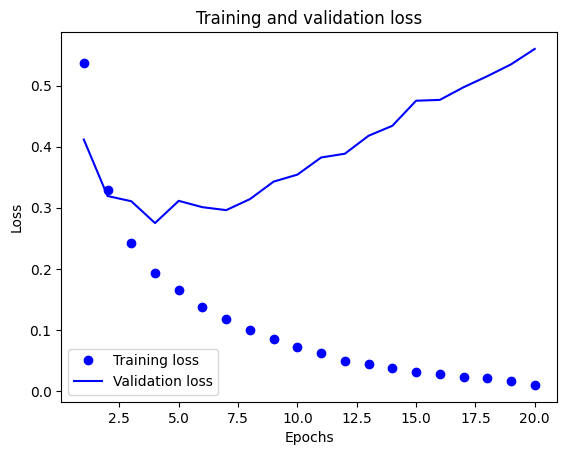

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss") # bo for blue dot
plt.plot(epochs, val_loss_values, "b", label="Validation loss") # b for solid blue line
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Plotting the training and validation accuracy

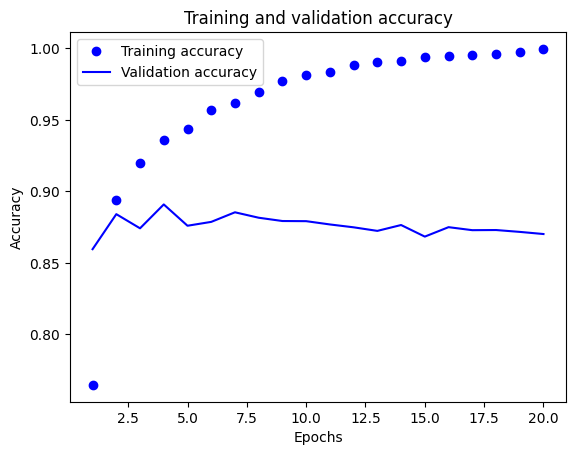

In [ ]:
plt.clf() # clears the figure
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy") # bo for blue dot
plt.plot(epochs, val_acc, "b", label="Validation accuracy") # b for solid blue line
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- Training loss decreases with each epoch and training accuracy increases with each epoch. What we wanted.
- But, not the case with validation loss and accuracy. They peak at around 4th epoch.
- Example of case when model performs better on training data but not on data it hasn't seen before.
- Practically, it's called ***overfitting***: after the fourth epoch, you’re overoptimizing on the training data, and you
end up learning representations that are specific to the training data and don’t gener-
alize to data outside of the training set.

We can stop training after the 4th epoch to prevent overfitting.

Train a new model from scratch for 4 epochs and then evaluate it on the test data:

### Retraining a model from scratch

In [ ]:
model = keras.Sequential({
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
})

In [ ]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"]
              )

In [ ]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7315 - loss: 0.5778
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.8918 - loss: 0.3048
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9247 - loss: 0.2191
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9361 - loss: 0.1830


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8866 - loss: 0.2852


In [ ]:
results

[0.2837822139263153, 0.8875200152397156]

So we finally get an accuracy of 88% with this naive approach. SOTA approaches, we should be able to get close to 95%.

## 4.1.5 Using a trained model to generate predictions on new data

We'll want to use our trained model in practical settings. We can generate the likelihood of reviews being positive or negative using the `predict` method:

In [ ]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.2299444 ],
       [0.9998014 ],
       [0.9147381 ],
       ...,
       [0.13728428],
       [0.10172421],
       [0.6404712 ]], dtype=float32)

We can see our model is confident for some examples (0.99 or more, or 0.01 or less), but less confident for others (0.6, 0.4) etc.

## 4.1.6 Further experiments

- Fiddle with the number of layers and units.
- Fiddle with the activation function or loss functions.

## 4.1.7 Wrapping up

- Gotta do a lot of preprocessing of data before feeding it to an NN. Other encoding options exist.
- Stacks of `Dense` layers with `relu` activations can solve a wide variety of problems.
- In a binary classification, our model should end with a `Dense` layer with 1 unit and a `sigmoid` activation: scalar between 0 and 1.
- Loss function to use is `binary_crossentropy`.
- `rmsprop` is generally a good optimizer.
- As they get better on training data, NNs start overfitting and end up obtaining worse results on unseen data. Monitor performance on data that is outside the training set: use validation set.

# 4.2 Classifying newswires: A multiclass classification example

- Build a model to classify Reuters newswires into 46 mutually exclusive topics.
- Many classes, thus *multiclass classification*.
- Since each data point should be classified onto only 1 category, it's *single-label multiclass classification*.
- Otherwise, it would be *multilabel multiclass classification*.

## 4.2.1 The Reuters dataset

- 46 different topics.
- Each topic has at least 10 examples in the training set.

### Loading the Reuters dataset

In [1]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000) # restricts data to be 10000 most frequently occcuring words found in the data

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print(len(train_data))
print(len(test_data))

8982
2246


In [4]:
# train_data[10] # each sample is a list of ints (word indices)

### Decoding newswires back to text

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_newswires = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]]
)

In [10]:
train_labels[1] # label is an int between 0 - 45——a topic index

4

## 4.2.2 Preparing the data

Vectorize the data using multi-hot encoding using the vectorize_sequences() function we wrote before.

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Labels can be vectorized using *one-hot encoding*, also called *categorical encoding*

In [13]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1.
  return results

y_train = to_one_hot(train_labels) # vectorized training labels
y_test = to_one_hot(test_labels) # vectorized testing labels

A built in Keras way to do the above:

```python
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

```

## 4.2.3 Building your model

- # of output has gone from 2 in the previous example to 46.
- Since each layer in a stack of Dense layers can only access the info. present in the output of the previous layer, if one layer drops some info. relevant to classification, this info. is lost.
- Each layer can potentially become an information bottleneck.
- So we increase the # of units in our layers from 16 to 46.
- Our last layer has 46 units (each entry encoding a different output class).
- Last layer uses a *softmax* activation.
  - The model will output a *probability distribution* over the 46 different output classes.
  - `output[i]` for a sample is the probability of that sample belonging to class `i`. The 46 scores sum to 1.

### Model definition

In [16]:

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

- Best loss function to use in this case is `categorical_crossentropy`
  - Measures the distance between 2 probab. distributions: here, b/w the prob. distribution output by the model and the true distribution of the labels.
- By minimizing the distance b/w these 2 distros., we train the model to output something as close as posible to true labels.

### Compiling the model

In [17]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## 4.2.4 Validating your approach

### Setting aside a validation set

Set apart 1,000 samples in the training data to use as validation set.

In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

### Training the model

Let's start with 20 epochs

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.4284 - loss: 3.1963 - val_accuracy: 0.6280 - val_loss: 1.8649
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6577 - loss: 1.6614 - val_accuracy: 0.6870 - val_loss: 1.4263
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7223 - loss: 1.2511 - val_accuracy: 0.7210 - val_loss: 1.2428
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.7755 - loss: 1.0286 - val_accuracy: 0.7520 - val_loss: 1.1287
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8104 - loss: 0.8660 - val_accuracy: 0.7700 - val_loss: 1.0443
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8465 - loss: 0.7046 - val_accuracy: 0.7650 - val_loss: 0.9957
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.8721 - loss: 0.5957 - val_accuracy: 0.7910 - val_loss: 0.9481
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8980 - loss: 0.4934 - val_accuracy: 0.8140 - v

### Plotting the training and validation loss

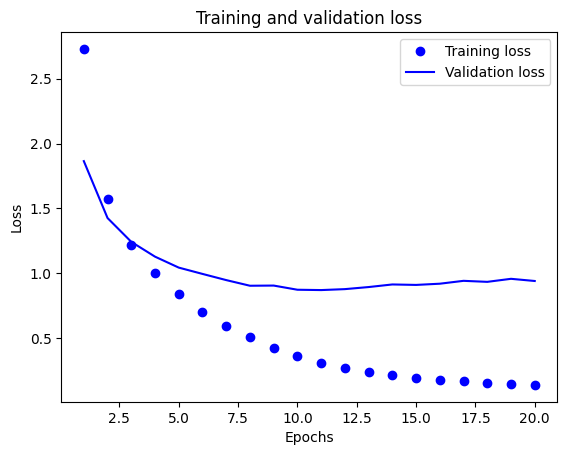

In [21]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Plotting the training and validation accurcacy

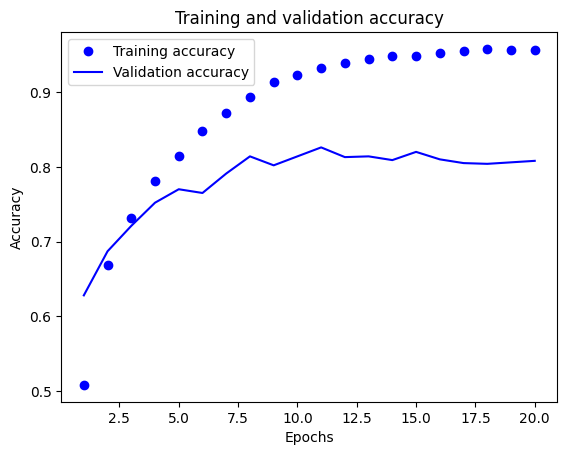

In [22]:
plt.clf()
accuracy = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see from the validation loss and accuracy that the model starts to overfit somewhere around 9 epochs.

Let's train a new model ffrom scratch for 9 epochs and evaluate on the test set.

### Retraining a model from scratch

In [23]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [24]:
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 131ms/step - accuracy: 0.4206 - loss: 3.0843
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6698 - loss: 1.5456
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step - accuracy: 0.7438 - loss: 1.1606
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.7911 - loss: 0.9331
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.8353 - loss: 0.7488
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8644 - loss: 0.6258
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8913 - loss: 0.5122
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.9125 - loss: 0.4135
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 86ms/step - accuracy: 0.9254 - loss: 0.3575


In [25]:
results = model.evaluate(x_test, y_test)
results

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8016 - loss: 0.8646


[0.8939741253852844, 0.7911843061447144]

This approach reaches an accuracy of ~80%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%. But in this case, we have 46 classes, and they may not be equally represented. What would be the accuracy of a random baseline? We could try quickly implementing one to check this empirically:

In [26]:
import copy
import numpy as np
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.1861086375779163

We can see a random classifier would score around only 19% classification accuracy. So our model seems pretty good in that light

## 4.2.5 Generating predictions on new data

Calling the model’s predict method on new samples returns a class probability distri-
bution over all 46 topics for each sample.

In [27]:
predictions = model.predict(x_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [28]:
predictions[0].shape # each entry in "predictions" is a vec of len 46

(46,)

In [33]:
np.sum(predictions[2]) # coeff. in this vector sum to 1 (since they're a prob. distro.)

0.9999998

In [40]:
np.argmax(predictions[2]) # largest entry is the predicted class——calss with the highest prob.

1

## 4.2.6 A different way to handle the labels and the loss

We said earlier that there are 2 ways to vectorize the labels. We used one-hot encoding. Another way is to cast them as an integer tensor as:

```python
y_train = np.array(train_labels)
y_test = np.array(test_labels)
```
This changed one thing: the choice od the loss function. Now we would use `sparse_categorical_crossentropy` instea of `categorical_crossentropy` as the later expects labels to follow a categorical encoding (one-hot encoding). So our code becomes:
```python
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
```
This is mathematically same as the other loss, just has a different interface.

## 4.2.7 The importance of having sufficiently large intermediate layers

Since our outputs are 46-dimensional, we avoided intermediate layers with many fewer than 46 units.

Let's implement an info. bottleneck by having intermediate layers with significantly less than 46 units, like 4D:

In [45]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.1359 - loss: 3.2765 - val_accuracy: 0.3680 - val_loss: 2.1745
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.4748 - loss: 2.0109 - val_accuracy: 0.5720 - val_loss: 1.6662
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6062 - loss: 1.5678 - val_accuracy: 0.6240 - val_loss: 1.4735
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6519 - loss: 1.2990 - val_accuracy: 0.6410 - val_loss: 1.3621
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6843 - loss: 1.1414 - val_accuracy: 0.6620 - val_loss: 1.3156
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7242 - loss: 1.0045 - val_accuracy: 0.6860 - val_loss: 1.2822
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7587 - loss: 0.9010 - val_accuracy: 0.6860 - val_loss: 1.2687
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7684 - loss: 0.8658 - val_accuracy: 0.7100 - v

The model now peaks at ~71% validation accuracy, an 8% absolute drop. This drop is mostly due to the fact that we’re trying to compress a lot of information (enough info. to recover the separation hyperplanes of 46 classes).

The model is able to cram most of the necessary information into these four-dimensional representations, but not all of it.

## 4.2.8 Further experiments

- Try using larger or smaller layers: 32 units, 128 units, and so on.
- We used two intermediate layers before the final softmax classification layer. Now try using a single intermediate layer, or three intermediate layers.

## 4.2.9 Wrapping up

- If we're trying to classify data among *N* classes, our model shouls end with a `Dense` layer of size *N*.
- In a single-label, multiclass classification, our model should end with a `softmax` activation so its output is a prob. distro. over the *N* classes.
- Use categorical crossentropy loss function for such problems.
- 2 ways to handle labels in multiclass classification:
  - Categorical encoding/one-hot encoding and using `categorical_crossentropy`
  - Encoding labels as integers and using `sparse_categorical_crossentropy`
- If we have to classify into a large number of categories, avoid creating info. bottlenecks fue to intermediate layers that are too small.

# 4.3 Predicting house prices: A regression example

Last 2 problems were classification problems. Now we are dealing with *regression* problem: predicting a continuous value instead of a discrete label.

## 4.3.1 The Boston housing price dataset

- Predict median price of homes in a given Boston suburb in mid-1970s.
- Crime rate, local property tax rate, etc.
- Relatively few data points. Only 506: 404 training and 102 test.
- Each *feature* has a different scale. Some between 0 and 1, others between 1 and 12, etc.

### Loading the Boston housing dataset

In [47]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = (
    boston_housing.load_data()
)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [48]:
print(train_data.shape)
print(test_data.shape)

(404, 13)
(102, 13)


Targets are th emedian values of owner-occupied homes, in thousands of dollars.

In [52]:
train_targets[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

## 4.3.2 Preparing the data

- Problematic to feed into the NN values that all take wildly different ranged
- Model might automatically adapt, but will make learning more difficult.
- Best practics: feature-wise normalization——subtract mean of feature and divide by st. dev. Done using Numy:

### Normalizing the data

In [53]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

IMPORTANT: The quantities used for normalizing the test data are computed using the training data. You should never use any quantity computed on the test data in your workflow, even for something a simple as data normalization.

## 4.3.3 Building your model

- Few samples → use small model
- 2 intermediate layers, 63 units each

IMP: In general, the less training data you have, the worse overfitting will be, and using a small model is one way to mitigate overfitting.

In [56]:
def build_model(): # We'll instantiate same model multiple times, so using a function
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

Model ends with a linear layer (single unit and no activation). Typical setup for scalar regression as an activation would constrain the value. We don't want that.

Loss: *mean squared error*
Metric: *mean absolute error*

## 4.3.4 Validating your approach using K-fold validation

Since our dataset is small, so will be our validation set (~100 examples) → our validation scores might change a lot depending on which data points we chose for validation and which for training: the validation scores might have a high ***variance*** with regard to validation split. This would prevent us from reliably evaliating our model.

Best practice: Use ***K-fold*** cross-validation.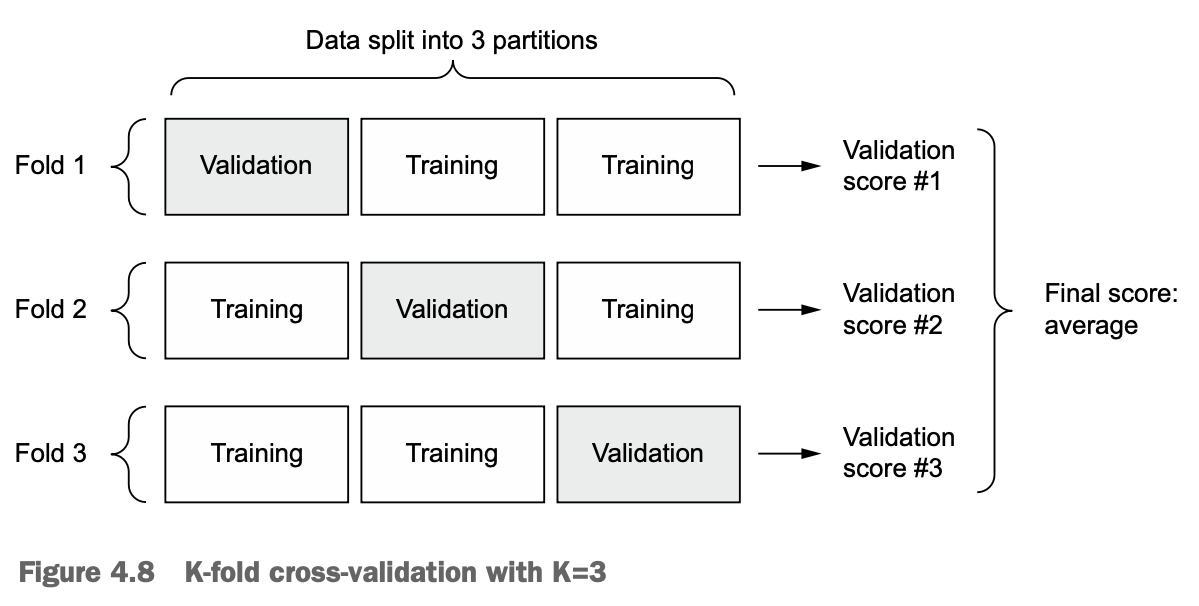

It consists of splitting the available data into K partitions (typically K = 4 or 5), instanti- ating K identical models, and training each one on K – 1 partitions while evaluating on the remaining partition. The validation score for the model used is then the average of the K validation scores obtained. In terms of code, this is straightforward.

### K-fold validation

In [57]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [58]:
print(all_scores)
print(np.mean(all_scores))

[1.9913126230239868, 2.4489541053771973, 2.399972677230835, 2.4355268478393555]
2.3189415633678436


- Different runs show different validation scores. 1.99 to 2.45.
- Average is 2.32.
- So, we're off by $2,320 on average, which is significant.

Let's train the model a bit longer (500 epochs). Let's also save the per-epoch validation score log to keep a record of how well the model does at each epoch.

### Saving the validation logs at each fold

In [59]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print(f"Processing fold #{i}")
  val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples] # prepares val data: data from partition #k
  val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]
  partial_train_data = np.concatenate(
      [train_data[:i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]],
      axis=0
  ) # prepares the training data: data from all other partitions
  partial_train_targets = np.concatenate(
      [train_targets[:i * num_val_samples],
       train_targets[(i + 1) * num_val_samples:]],
      axis=0
  )
  model = build_model() # builds keras model (already compiled)
  history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=16, verbose=0) # trains model (in silent mode, verbose=0)
  mae_history = history.history["val_mae"]
  all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


We can then compute the average of the per-epoch MAE scored for all folds:

### Building the history of successive mean K-fold validation scoores

In [60]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)
]

### Plotting validation scores

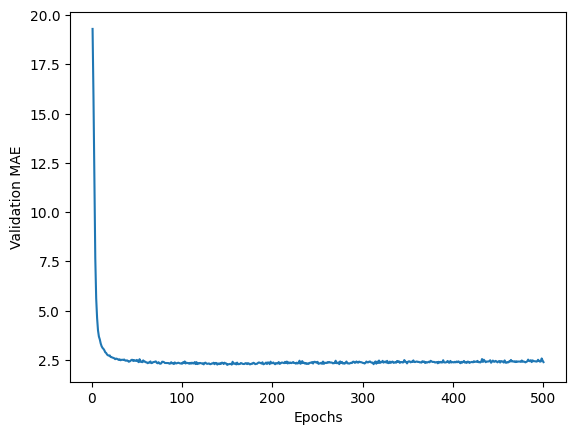

In [61]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Let's omit the first 10 data points, which are on a different scale than the rest of the curve:

### Plotting validation scores, excluding the first 10 data points

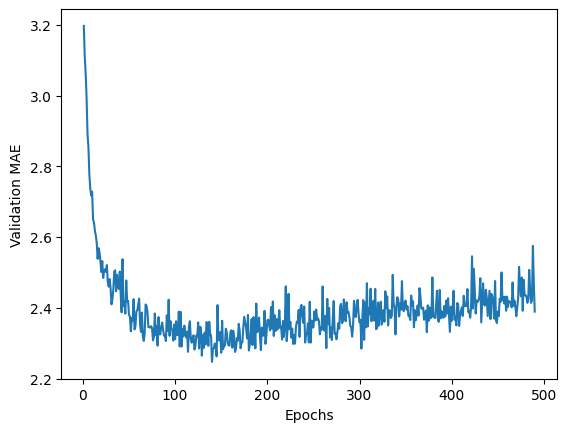

In [62]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

We can see that validation MAE stops improving significantly after 120-140 epochs: we start overfitting.

Once we're done tuning the other params of the model, we can train a final production model on all training data, with the best params, and then look at its performance on the test data.

### Training the final model

In [63]:
model = build_model() # fresh, complied model
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0) # trains it on entirety of data
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.7487 - mae: 2.2907 


In [64]:
test_mae_score

2.515122175216675

We're off by $2,515. Not an improvement. We can vary the number of layers or the number of units to see if we can squeeze out a lowest test error.

## 4.3.5 Generating predictions on new data

For this example, `predict()` returns the model's guess for the sample's price in thousands of dollars:

In [65]:
predictions = model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


array([8.8418455], dtype=float32)

## 4.3.6 Wrapping up

- Regression is done using different loss functions than classification. MSE is commonly used.
- Similary, evaluation metrics differ. Naturally, accuracy doesn't apply for regression. MAE is a common metric.
- When features in input data have different ranges, each feature shouuld be scaled up independently as a preprocessing step.
- When data is little, using K-fold validation is a great way to reliably evaluate a model.
- When training data is little, it's preferable to use a small model with few intermediate layers (typically one or two), in order to avoid overfitting.

# Summary

- 3 most commong types of ML tasks on vector data: binary classification, multiclass classification, and scalar regression.
- Need to preprocess raw data before feeding it to the NN.
- Scale each feature independently when data has features with varying ranges.
- NNs begin to overfit as training progresses an obtain worse results on never-seen-before data.
- If training data is small, use small model with only. 1-2 intermediate layers to avoid overfitting.
- If data is divided into many categories, we might cause info. bottlenecks if we make the intermediate layers too small.
- When we have little data, K-fold validation can help to evaluate the model reliably.